In [94]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [95]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [96]:
print(train_X.shape)

(60000, 28, 28)


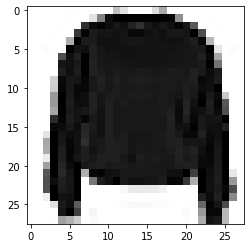

In [97]:
plt.imshow(train_X[7], cmap = plt.cm.binary)
plt.show()

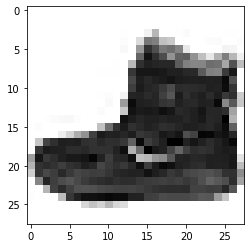

In [98]:
plt.imshow(train_X[0], cmap = plt.cm.binary)
plt.show()

In [99]:
train_X = train_X.reshape(-1, 28,28,1)
test_X = test_X.reshape(-1, 28,28, 1)

In [100]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [101]:
train_X = train_X/255
test_X = test_X/255

In [102]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [103]:
print('train_shape\n',train_X.shape)
print('test_Y_one_hot\n',test_Y_one_hot)

train_shape
 (60000, 28, 28, 1)
test_Y_one_hot
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
print(test_Y.shape)
print(test_Y[0])
print(test_Y_one_hot[0])

(10000,)
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [105]:
model = Sequential()

In [106]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [107]:
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [108]:
model.add(Flatten())
model.add(Dense(64))

In [109]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [110]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [111]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 695us/step - loss: 0.4664 - accuracy: 0.8324
Epoch 2/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.3188 - accuracy: 0.8859
Epoch 3/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.2791 - accuracy: 0.8985
Epoch 4/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.2495 - accuracy: 0.9088
Epoch 5/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.2295 - accuracy: 0.9162
Epoch 6/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.2155 - accuracy: 0.9202
Epoch 7/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.1968 - accuracy: 0.9269
Epoch 8/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.1840 - accuracy: 0.9321
Epoch 9/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.1707 - accuracy: 0.9376
Epoch 10/10
60000/60000 [============

In [112]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

10000/10000 [==============================] - 2s 168us/step


In [113]:
print('Test loss',test_loss)
print('Test accuracy',test_acc)

Test loss 0.28237294555306436
Test accuracy 0.9132000207901001


In [114]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

9


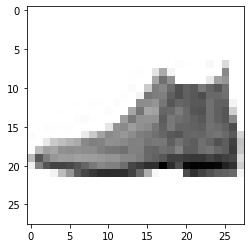

In [115]:
plt.imshow(test_X[0].reshape(28,28), cmap = plt.cm.binary)
plt.show()

In [116]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

2


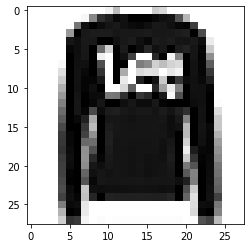

In [117]:
plt.imshow(test_X[1].reshape(28,28), cmap = plt.cm.binary)
plt.show()

In [118]:
print(predictions.shape) #มีเสื้อ10แบบ 10000 ชุด

(10000, 10)


In [119]:
print(predictions[0,:])

[9.2626748e-12 5.9116682e-13 3.7604689e-12 9.1166311e-13 4.3493598e-12
 3.9283524e-08 1.5001484e-12 1.3047895e-04 2.7941396e-11 9.9986947e-01]


In [120]:
print(np.round(predictions[1]))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [121]:
print(np.argmax(np.round(predictions[1])))

2
